#Dhermendra Kumar Tiwari
#Computer Vision & Internet of Things
#Color Identification in Images  (Level - Beginner)

In [15]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

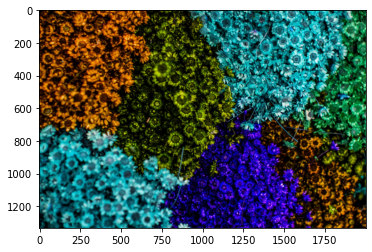

In [27]:
image = cv2.imread('1.jpg')
plt.imshow(image)

The type of this input is <class 'numpy.ndarray'>
Shape: (656, 875, 3)


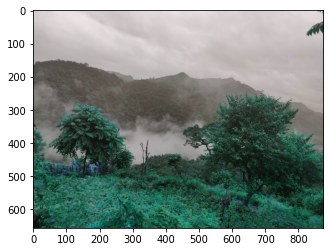

In [16]:
image = cv2.imread('2.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

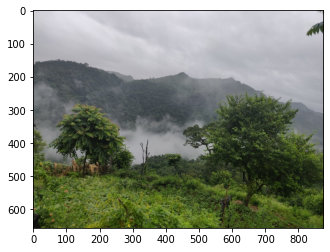

In [17]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

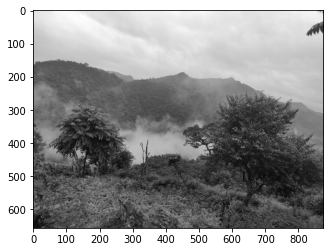

In [18]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

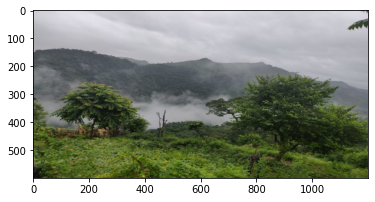

In [19]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [20]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [21]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [22]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([61.88383954, 76.03338235, 34.74406102]),
 array([152.72892442, 154.50778654, 156.84385382]),
 array([ 97.39401304, 114.03410099,  48.0914246 ]),
 array([113.87454387, 119.04847958, 115.97971329]),
 array([207.39243911, 207.05560536, 214.5809236 ]),
 array([31.89165039, 41.34004971, 20.52420262]),
 array([81.14480064, 88.00338368, 88.66302717]),
 array([183.78313319, 184.16726663, 191.24698414])]

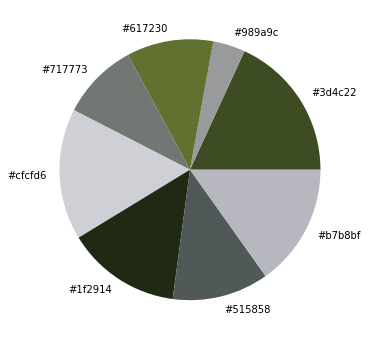

In [23]:
get_colors(get_image('2.jpeg'), 8, True)